<a href="https://colab.research.google.com/github/fjtm/deep-fake-voice-recognition/blob/feature%2Fstart/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone -b feature/start https://github.com/fjtm/deep-fake-voice-recognition.git
%cd deep-fake-voice-recognition/

In [ ]:
! pip install -q kaggle
! pip install playsound
! pip install pydub

In [ ]:
import IPython
from scipy.io import wavfile
from pydub import AudioSegment
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d birdy654/deep-voice-deepfake-voice-recognition
! unzip deep-voice-deepfake-voice-recognition.zip

Example of real and fake audios

In [ ]:
real_audio = "DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3"
fake_audio = "DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3"

In [ ]:
IPython.display.Audio(real_audio)

In [ ]:
IPython.display.Audio(fake_audio)

In [ ]:
AudioSegment.from_wav("KAGGLE/AUDIO/FAKE/Obama-to-Biden.wav")

In [ ]:
AudioSegment.from_wav( "KAGGLE/AUDIO/REAL/biden-original.wav")

# Loading data exapmle

In [ ]:
# Load an audio file
audio_file = "KAGGLE/AUDIO/FAKE/Obama-to-Biden.wav"
y, sr = librosa.load(audio_file, sr = 10000)

# Chromagram from a waveform.

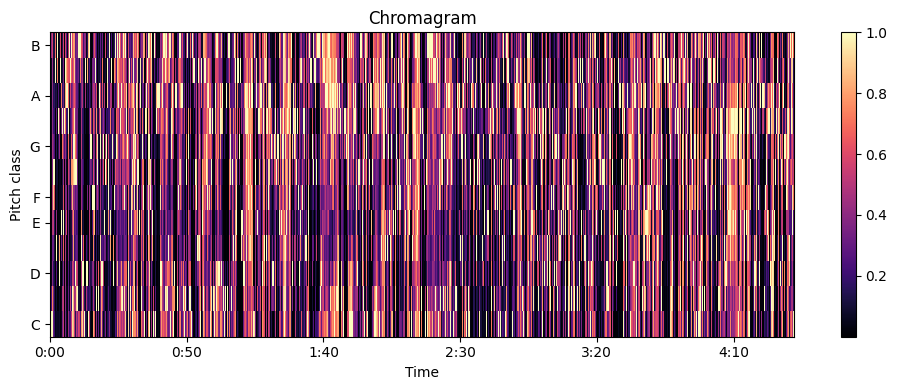

In [ ]:
# Compute the chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma = 12)

# Display the chromagram
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# RMS root-mean-square Value for each frame

<ipython-input-31-3968f6076a43>:6: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(rms, sr=sr, x_axis='time')


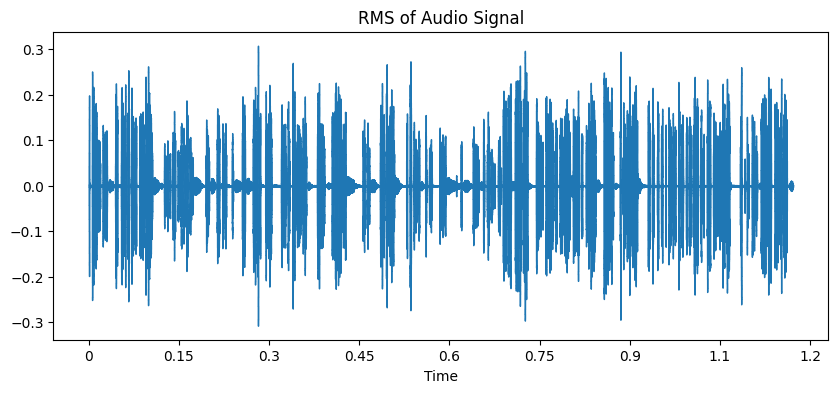

In [ ]:
# Compute the chromagram
rms = librosa.feature.rms(y=y)

# Create a plot of the RMS
plt.figure(figsize=(10, 4))
librosa.display.waveshow(rms, sr=sr, x_axis='time')
plt.title("RMS of Audio Signal")
plt.show()

# Spectral centroid

[Text(0.5, 1.0, 'log Power spectrogram')]

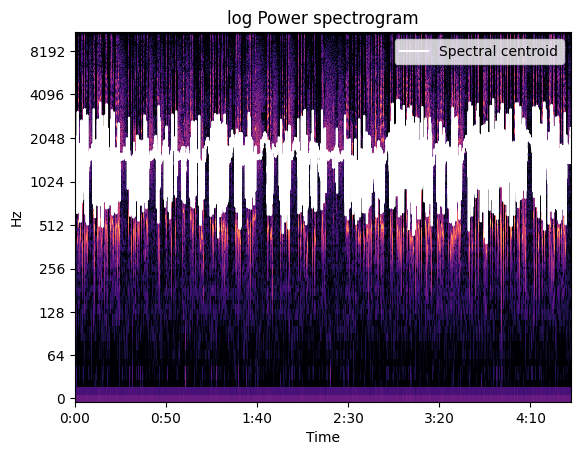

In [ ]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))

freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

# Spectral bandwidth

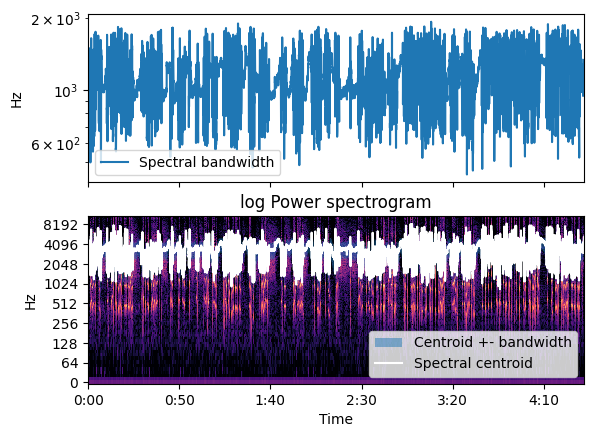

In [ ]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))
# librosa.feature.spectral_bandwidth(S=S)
# freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

# Rolloff

[Text(0.5, 1.0, 'log Power spectrogram')]

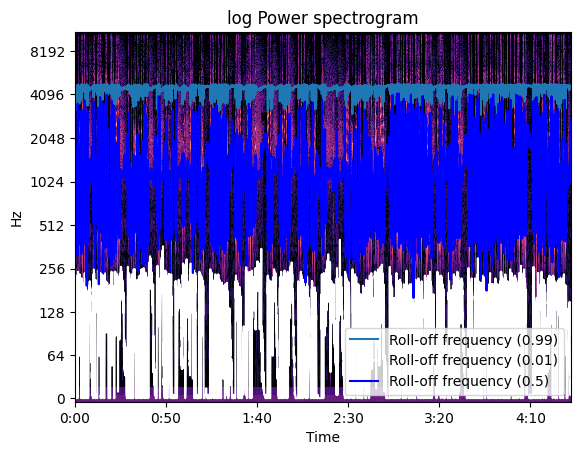

In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.5)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.plot(librosa.times_like(rolloff), rolloff_mean[0], color='b',
        label='Roll-off frequency (0.5)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

# Zero cross rate

In [ ]:
zero_crossings_rate = librosa.feature.zero_crossing_rate(y)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(zero_crossings_rate, sr=sr, x_axis='time', alpha=0.7)
plt.title('Zero-Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')
plt.show()

# MFCC

[Text(0.5, 1.0, 'MFCC')]

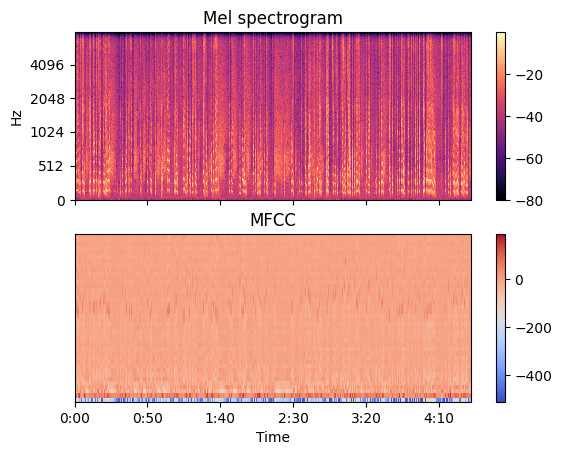

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, dct_type = 1)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')